# Linear Regression

# Basic
- Linear Equation
- Linear System: n개의 linear equations 집합
- [Reduced Echelon Form](https://ko.wikipedia.org/wiki/%EC%82%AC%EB%8B%A4%EB%A6%AC%EA%BC%B4%ED%96%89%EB%A0%AC)
- Vector
- [Linear Combination](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95%EA%B2%B0%ED%95%A9)

# Numpy

In [1]:
import numpy as np

In [18]:
a = np.array([[1,2,3],
         [4,5,6],
         [7,8,9]])
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [19]:
b = np.array([0,1,3])
print(b)

[0 1 3]


In [20]:
print(a.shape, b.shape)

(3, 3) (3,)


In [21]:
c = a * b
print(c)

[[ 0  2  9]
 [ 0  5 18]
 [ 0  8 27]]


In [22]:
a@b # dot product 3.x support, equals to a.dot(b)

array([11, 23, 35])

# Linear Regression

아버지와 아들의 키의 상관 관계를 나타내보자.
y = wx + b
(x: 아버지의 키, y: 아들의 키)

아버지의 키가 아들의 키에 어떻게 영향을 미치는지, 인과관계에 따라 x값과 y값이 바뀌죵

## Loss function
최적의 w와 b를 찾아나가기 위해, 데이터를 피팅해나가며 **실제 값과 예측 값**이 얼마나 차이나는지 계산하는 함수.

2차 함수로 표현하는 이유는 미분을 통해 loss의 최솟값(optimize 할 point)을 알아낼 수 있기 때문!

## Learning rate
Loss function의 최솟값에 도달하기 위해, x를 얼만큼 움직이며 학습 시킬 것인가? 
[참고](https://github.com/aria-grande/TIL/blob/f14aa50ca2f5007500cd16e82559ab7df8ec662f/ML/ml_dl_introduction.md#%ED%95%99%EC%8A%B5%EB%A5%A0learning-rate)

learning rate를 크게 잡아서 학습 시키다가 갈수록 이 값을 줄여서 학습을 시키면서 최적점을 찾아나간다.

## 실습
인구 수가 도시의 이익에 영향을 어떻게 미치는가?

In [46]:
%pylab inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


In [39]:
data = np.loadtxt('./data/ex1data1.txt', delimiter=',')
print("도시의 갯수는 " + str(data[:,0].shape))

도시의 갯수는 (97,)


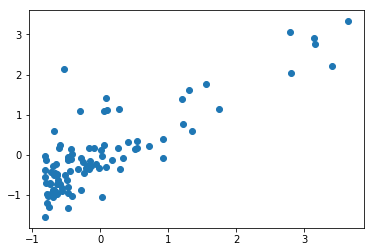

In [82]:
X = data[:, 0].reshape(97, 1) # Population
Y = data[:, 1].reshape(97, 1) # Profit

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X = scaler_x.fit_transform(X) # 큰 수들을 작은 수로 scaling
Y = scaler_y.fit_transform(Y)

scatter(X, Y) # X와 Y를 그려보자.

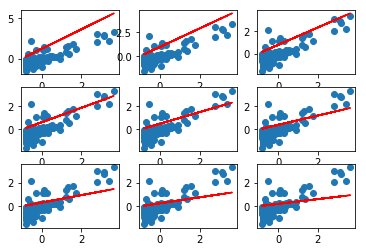

In [83]:
weight = np.array([1.89411133]) # 임의의 값을 넣어보자

# X: population
def predict(weight, X):
    N = len(X)
    y_pred = weight.dot(X.T) + weight[0] # prediction # .T는 transpose를 의미
    y_pred = y_pred.reshape(X.shape)
    return y_pred

def gradient_descent(X, Y, w, eta=0.1):
    N = len(X)
    y_pred = predict(w, X)
    # Derivation
    loss = Y - y_pred
    w_delta = 2/N * np.sum(-loss.T.dot(X))
    b_delta = 2/N * np.sum(-loss)
    # Update
    w[1:] = w[1:] - eta * w_delta
    w[0] = w[0] - eta * b_delta
    return w
    

# 한 번 학습한거다.
gradient_descent(X, Y, weight)

# N 번 해보자.
for i in range(1, 10):
    w = gradient_descent(X, Y, weight)
    y_pred = predict(weight, X)
    
    axes = subplot(3, 3, i) # 그래프를 3 x 3로 나열하는데, i 번째에 그린다.
    scatter(X, Y)
    plot(X, y_pred, color='red') # 많이 돌릴 수록 학습하는 그래프를 볼 수 있다.